# Sklearn GridSearchCV. Cross Validation in Scikit-Learn

By: jcchouinard.com

-----

## What is GridSearchCV

GridSearchCV tests different hyperparameter values to find the best one for your model.

You should use GridSearchCV instead of KFold and cross_val_score when you're not only looking to evaluate a model but also want to tune hyperparameters to find the best combination for your model. 

## How GridSearchCV Works

- GridSearchCV splits the training data in k equal parts (folds). 
- Each fold is used as a validation set and the remaining is used as training

![](https://stanford.edu/~shervine/teaching/cs-229/illustrations/train-val-test-en.png?0949795ac868562e193efdc249ae1066)

*Credit Stanford University*

![](cross-validation-basics.png)

- Perform cross-validation (e.g., with KFold) for each combination of hyperparameters.
- Return the best hyperparameters based on the average performance across the cross-validation folds.

![](cv.png)

##  Example on the Breast Cancer Dataset

In [27]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
# Show features and targets
print('Features:', dataset.feature_names)
print('Targets:', dataset.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: ['malignant' 'benign']


In [29]:
# Get data as arrays
X = dataset.data  
y = dataset.target


## Data Preparation and Splitting

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Performing GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Defining the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],   # Trying different 'k' n_neighbors values
}

# Set up GridSearchCV
knn_cv = GridSearchCV(
            knn, 
            param_grid, 
            cv=5, 
            scoring='accuracy'
        )

## Training the Models

In [33]:
# Train the model
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

## Finding the Best Parameters

In [34]:
# Find the best parameters and score
print(f"Best parameters: {knn_cv.best_params_}")
print(f"Best cross-validated accuracy: {knn_cv.best_score_:.2f}")

Best parameters: {'n_neighbors': 5}
Best cross-validated accuracy: 0.91


## Evaluating the Best Model

In [35]:
# Evaluate the best model on the test set
best_knn = knn_cv.best_estimator_ # model that performed best
y_pred = best_knn.predict(X_test)
test_accuracy = best_knn.score(X_test, y_test)

print(f"Test set accuracy: {test_accuracy:.2f}")

Test set accuracy: 0.96


## Scalability of GridSearchCV

In [2]:
5 ** 7 * 10

781250

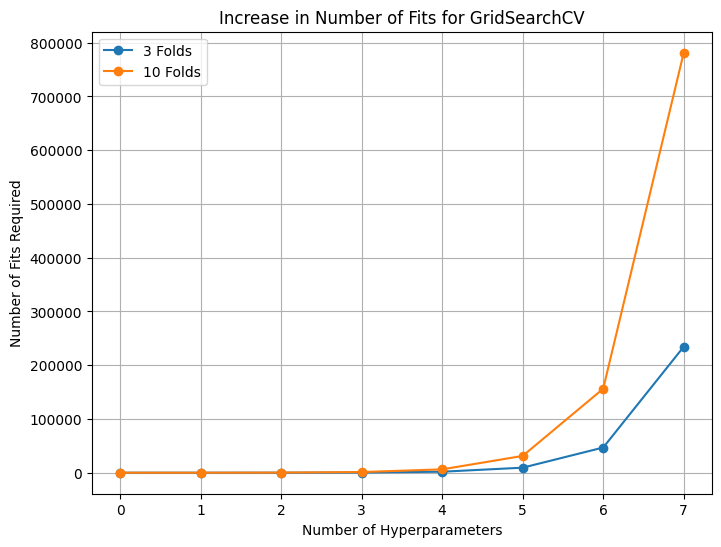

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the number of fits required for GridSearchCV
def calculate_fits(num_params, num_folds, num_values_per_param):
    return num_values_per_param ** num_params * num_folds

# Parameters
num_params_list = np.arange(0,8) # Number of hyperparameters (1 to 5)
num_values_per_param = 5  # Assume each hyperparameter has 5 possible values

# Calculate the number of fits for each number of hyperparameters
fits_5_folds = [calculate_fits(num_params, 3, num_values_per_param) for num_params in num_params_list]
fits_10_folds = [calculate_fits(num_params, 10, num_values_per_param) for num_params in num_params_list]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(num_params_list, fits_5_folds, marker='o', label='3 Folds')
plt.plot(num_params_list, fits_10_folds, marker='o', label='10 Folds')

plt.title('Increase in Number of Fits for GridSearchCV')
plt.xlabel('Number of Hyperparameters')
plt.ylabel('Number of Fits Required')
plt.xticks(num_params_list)  # Set x-ticks to match the number of params
plt.grid(True)
plt.legend()  # Add legend to differentiate lines
plt.show()


## RandomizedSearchCV to the Rescue

An alternative is to use `RandomizedSearchCV` from `sklearn.model_selection`.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate
knn = KNeighborsClassifier()

 #Set parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 50)   
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn, 
    param_grid, 
    n_iter=10,  # Limit the number of iterations (10 combinations)
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can use 'precision', 'recall', or 'f1' here for different use cases
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Find the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validated accuracy: {random_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_knn = random_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)

print(f"Test set accuracy: {test_accuracy:.2f}")

Best parameters: {'weights': 'uniform', 'n_neighbors': 10}
Best cross-validated accuracy: 0.91
Test set accuracy: 0.98


## Conclusion

Help me and subscribe to this channel.

Stay tuned for my upcoming Python for SEO course.

### [jcchouinard.com](https://www.jcchouinard.com/)
### [youtube.com/@jcchouinard](https://www.youtube.com/@jcchouinard)
### [twitter.com/ChouinardJC](https://twitter.com/ChouinardJC)
### [linkedin.com/in/jeanchristophechouinard](https://www.linkedin.com/in/jeanchristophechouinard)
